# Tarea 4

### 1. Graficar como convergen $4$ condiciones iniciales a las raiz real de $x^3 - x^2 - x - 1$ utilizando el método de Newton.

Lo primero que hacemos es realizar un código que nos permita calcular las raices del polinomio.

In [1]:
f(x)=x^3-x^2-x
df(x)=3x^2-2x-1

df (generic function with 1 method)

In [2]:
function raiz(s)
    x=s;
    for i in 1:20
    
    x=x-f(x)/df(x)
        
end
return x
end 

raiz (generic function with 1 method)

In [4]:
raiz(3)

1.618033988749895

In [5]:
f(ans)

0.0

In [8]:
Pkg.add("PyPlot") #Instalamos las paqueterias para graficar.

INFO: Package PyPlot is already installed
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [10]:
using PyPlot

In [30]:
function raiz(inicial)list5=derivada_simetrica(cos,pi/4)
    x=inicial;
list=zeros(Complex64,20);# Graficará 20 puntos
for i in 1:20
    x=x-f(x)/df(x)
    list[i]=x; # Me crea una lista de datos que ha iterado
end
    return list
end

raiz (generic function with 1 method)

In [44]:
list1=raiz(2); # Llamo a las listas de las codiciones deseadas
list2=raiz(4);
list3=raiz(5);
list4=raiz(9);

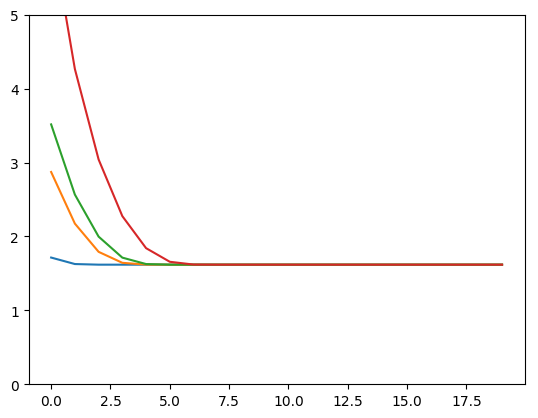

(0, 5)

In [43]:
plot(real(list1)) # Grafico la parte real de las listas opbtenidas anteriormente
plot(real(list2)) # Esto mostrará gráficas continuas
plot(real(list3))
plot(real(list4))
show()
ylim(0,5)#Sirve para limitar el rango de diha coordenada

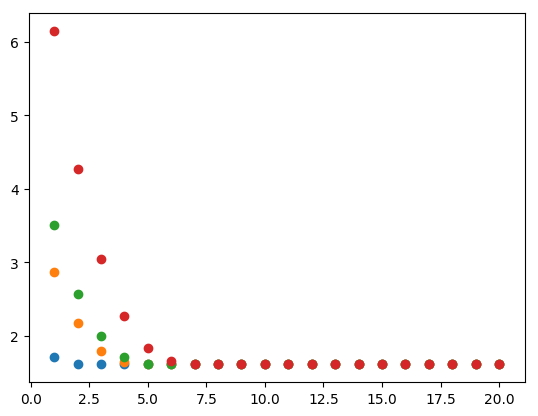

In [39]:
# Para graficar solamente puntos usamos scatter, donde colocamos el rango y lo que va a graficar
scatter(1:20,real(list1)); scatter(1:20,real(list2)); scatter(1:20,real(list3)); scatter(1:20,real(list4));

### Usando el método de bisección para $p_k$. tenemos lo siguiente.

In [45]:
function biseccion(a,b)
    p=(a+b)/2
for i in 1:20
        if  f(a)*f(p) > 0
            a = p
        end
        if f(b)*f(p) > 0
            b = p
        end
        p = (a+b)/2
    end
    return p,f(p)
end

biseccion (generic function with 1 method)

In [48]:
list5=raiz(2); # Llamo a las listas de las codiciones deseadas
list6=raiz(4);
list7=raiz(5);
list8=raiz(9);

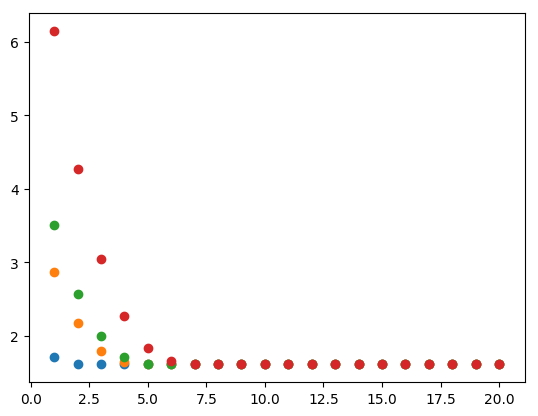

In [51]:
scatter(1:20,real(list5)); scatter(1:20,real(list6)); scatter(1:20,real(list7)); scatter(1:20,real(list8));

### 2. Crear una función en Julia que implemente el método de Newton para funciones arbitrarias.

#### 2.1 Que tome como argumentos tanto a la función, su derivada y la condición inicial. 

In [8]:
function metodo(f,df,inicial)
      
    list=zeros(Complex64,20);
    x=inicial;
for i in 1:20
        x=x-f(x)/df(x)
    list[i]=x; # Me crea una lista de datos que ha iterado
    end
    return x
end

metodo (generic function with 1 method)

In [9]:
f(x)=x^3-x^2-x  #Tmomemos la función del punto anterior
df(x)=3x^2-2x-1

metodo(f,df,9)

1.618033988749895

In [10]:
f(ans)

0.0

#### 2.2 Hacer la misma función pero que en lugar de tomar como argumento una condición inicial, tome un rango amplio de condiciones iniciales, por ejemplo costruido con linspace.

In [11]:
function metodo_(a,b)
    x=a:b #ESte es nuestro linspace
    s=b-a #Es el numero de valores que va a realizar
    list=zeros(s)
for i in 1:s
    list[i]=metodo(f,df,x[i])
    end
    return list
end

metodo_ (generic function with 1 method)

In [12]:
metodo_(1,9)

8-element Array{Float64,1}:
 NaN      
   1.61803
   1.61803
   1.61803
   1.61803
   1.61803
   1.61803
   1.61803

#### 2.3 Crear la misma rutina solo que esta vez de solo la lista con la raices que son genuinamente diferentes hasta un epsilon.

In [21]:
function metodo3(a,b)
  
list=metodo_(a,b) #Que os haga una lista usando el mètodo anterior 
   t=[]
    
    for i in 1:length(list)
    iteraciones=0
          for j in 1:length(t)
              if list[i]>t[j]+e
                    iteraciones=iteraciones+1
                end
                if list[i]<iteraciones[j]-e
                    iteraciones=iteraciones+1
                end
            end
            if iteraciones==length(t)
                push!(t,list[i]) #Le pedimos que nos que todo lo repetido
            end
        end
        return t
    end

metodo3 (generic function with 2 methods)

In [26]:
metodo3(3,22)

1-element Array{Any,1}:
 1.61803

##### Podemos notar que ahora solo los arroja una sola cifra y ya no varias (e iguales) como al ejercicio anterior. 